<a href="https://colab.research.google.com/github/ArpitaChatterjee/Object-Detection/blob/main/ObjectDetectionTF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow-gpu

     |████████████████████████████████| 454.3MB 36kB/s 


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.5.0


### Clone the repository

In [ ]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 57678, done.
remote: Counting objects: 100% (100/100), done.
remote: Compressing objects: 100% (89/89), done.
remote: Total 57678 (delta 36), reused 68 (delta 10), pack-reused 57578
Receiving objects: 100% (57678/57678), 572.84 MiB | 38.15 MiB/s, done.
Resolving deltas: 100% (39979/39979), done.


In [ ]:
pwd

'/content'

In [ ]:
cd /content/models/research

/content/models/research


In [ ]:
pwd

'/content/models/research'

### Install Protobuff
 Tensorflow Object Detection API uses Protobufs to configure model and training parameters.

In [ ]:
!protoc object_detection/protos/*.proto --python_out=.

### Install COCO API 

In [ ]:
!git clone https://github.com/cocodataset/cocoapi.git

Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 34.01 MiB/s, done.
Resolving deltas: 100% (576/576), done.


In [ ]:
cd cocoapi/PythonAPI

/content/models/research/cocoapi/PythonAPI


In [ ]:
!make

python setup.py build_ext --inplace
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/models/research/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/pycocotools
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fdebug-prefix-map=/build/python3.7-OGiuun/python3.7-3.7.10=. -fstack-protector-strong -Wformat -Werror=format-security -g -fdebug-prefix-map=/build/python3.7-OGiuun/python3.7-3.7.10=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.7/dist-packages/n

In [ ]:
cp -r pycocotools /content/models/research

### **Install Object detection API**

In [ ]:
pwd

'/content/models/research/cocoapi/PythonAPI'

In [ ]:
cd ..

/content/models/research/cocoapi


In [ ]:
cd ..

/content/models/research


In [ ]:
cp object_detection/packages/tf2/setup.py .

In [ ]:
!python -m pip install .

Processing /content/models/research
     |████████████████████████████████| 9.6MB 17.3MB/s 
     |████████████████████████████████| 358kB 49.5MB/s 
     |████████████████████████████████| 1.6MB 51.6MB/s 
     |████████████████████████████████| 153kB 54.9MB/s 
     |████████████████████████████████| 2.3MB 18.7MB/s 
     |████████████████████████████████| 829kB 50.9MB/s 
     |████████████████████████████████| 61kB 8.6MB/s 
     |████████████████████████████████| 1.2MB 40.1MB/s 
     |████████████████████████████████| 686kB 43.1MB/s 
     |████████████████████████████████| 38.2MB 69kB/s 
     |████████████████████████████████| 51kB 8.0MB/s 
     |████████████████████████████████| 174kB 52.4MB/s 
     |████████████████████████████████| 61kB 9.4MB/s 
     |████████████████████████████████| 102kB 14.0MB/s 
     |████████████████████████████████| 645kB 44.7MB/s 
  Created wheel for object-detection: filename=object_detection-0.1-cp37-none-any.whl size=1651057 sha256=cb3a7e4fc094b446d5e28c26b

### Test installation

In [ ]:
!python object_detection/builders/model_builder_tf2_test.py

2021-06-03 03:24:00.415809: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
Running tests under Python 3.7.10: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2021-06-03 03:24:02.381262: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-06-03 03:24:02.441689: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-06-03 03:24:02.442279: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-06-03 03:24:02.442317: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfull

In [ ]:
pwd

'/content/models/research'

## Prepare the dataset 
### Annote the dataset -->
using labelimg and put it in images train n test folder

In [ ]:
cd /content/training_demo/pre-trained-models

/content/training_demo/pre-trained-models


In [ ]:
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet101_v1_fpn_640x640_coco17_tpu-8.tar.gz

--2021-06-03 03:30:03--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet101_v1_fpn_640x640_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.250.65.80, 2607:f8b0:4004:815::2010
Connecting to download.tensorflow.org (download.tensorflow.org)|142.250.65.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 386527459 (369M) [application/x-tar]
Saving to: ‘ssd_resnet101_v1_fpn_640x640_coco17_tpu-8.tar.gz’

ssd_resnet101_v1_fp 100%[===================>] 368.62M   155MB/s    in 2.4s    

2021-06-03 03:30:06 (155 MB/s) - ‘ssd_resnet101_v1_fpn_640x640_coco17_tpu-8.tar.gz’ saved [386527459/386527459]



In [ ]:
!tar -xvf ssd_resnet101_v1_fpn_640x640_coco17_tpu-8.tar.gz

ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/checkpoint/
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/checkpoint/checkpoint
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/checkpoint/ckpt-0.index
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/pipeline.config
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/saved_model/
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/saved_model/saved_model.pb
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/saved_model/assets/
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/variables.index


In [ ]:
pwd

'/content/training_demo/pre-trained-models'

In [ ]:
cd /content/training_demo

/content/training_demo


In [ ]:
!pip install python 

In [ ]:
ls

annotations/  generate_tfrecord.py  images/  models/  pre-trained-models/


### Install Pre-trained model

In [ ]:
# Create train data:
!python generate_tfrecord.py -x /content/training_demo/images/train -l /content/training_demo/annotations/label_map.pbtxt -o /content/training_demo/annotations/train.record

# Create test data:
!python generate_tfrecord.py -x /content/training_demo/images/test -l /content/training_demo/annotations/label_map.pbtxt -o /content/training_demo/annotations/test.record

Successfully created the TFRecord file: /content/training_demo/annotations/train.record
Successfully created the TFRecord file: /content/training_demo/annotations/test.record


In [ ]:
ls

annotations/         export_tflite_graph_tf2.py  models/
exported_models/     generate_tfrecord.py        pre-trained-models/
exported-models/     images/
exporter_main_v2.py  model_main_tf2.py


### Training The Model

In [ ]:
!python model_main_tf2.py --model_dir=/content/training_demo/models/my_ssd_resnet101_v1_fpn --pipeline_config_path=/content/training_demo/models/my_ssd_resnet101_v1_fpn/pipeline.config

python3: can't open file 'model_main_tf2.py': [Errno 2] No such file or directory


In [ ]:
pwd

'/content/training_demo'

In [ ]:
!python exporter_main_v2.py --input_type image_tensor --pipeline_config_path /content/training_demo/models/my_ssd_resnet101_v1_fpn/pipeline.config --trained_checkpoint_dir /content/training_demo/models/my_ssd_resnet101_v1_fpn --output_directory /content/training_demo/exported_models/my_model

2021-06-03 06:27:07.420513: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-06-03 06:27:13.643330: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-06-03 06:27:13.707979: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-06-03 06:27:13.708647: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-06-03 06:27:13.708697: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-06-03 06:27:13.827508: I tensorflow/stream_executor/platform/default

## **Inferensing my trained Model**

In [ ]:
"""
object detection on image from tf2 saved model
"""

import os
os.environ['TF_CPP_MIN_LOG_LEVEL']= '2'
import pathlib
import tensorflow as tf
import cv2
import argparse
from google.colab.patches import cv2_imshow

#enable GPU dynamic memory allocation
gpus= tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

#path to img dir.
img_path='/content/training_demo/images/train/image18.jpg'

#path to model dir.
model_path= '/content/training_demo/exported_models/my_model'

#path to label map
label_path= '/content/training_demo/annotations/label_map.pbtxt'

#minimum confidence threshold
min_config_thresh = float(0.60)

Loading Model... Done!! Took 21.7320237159729 seconds
Running inference for /content/training_demo/images/train/image18.jpg... Done


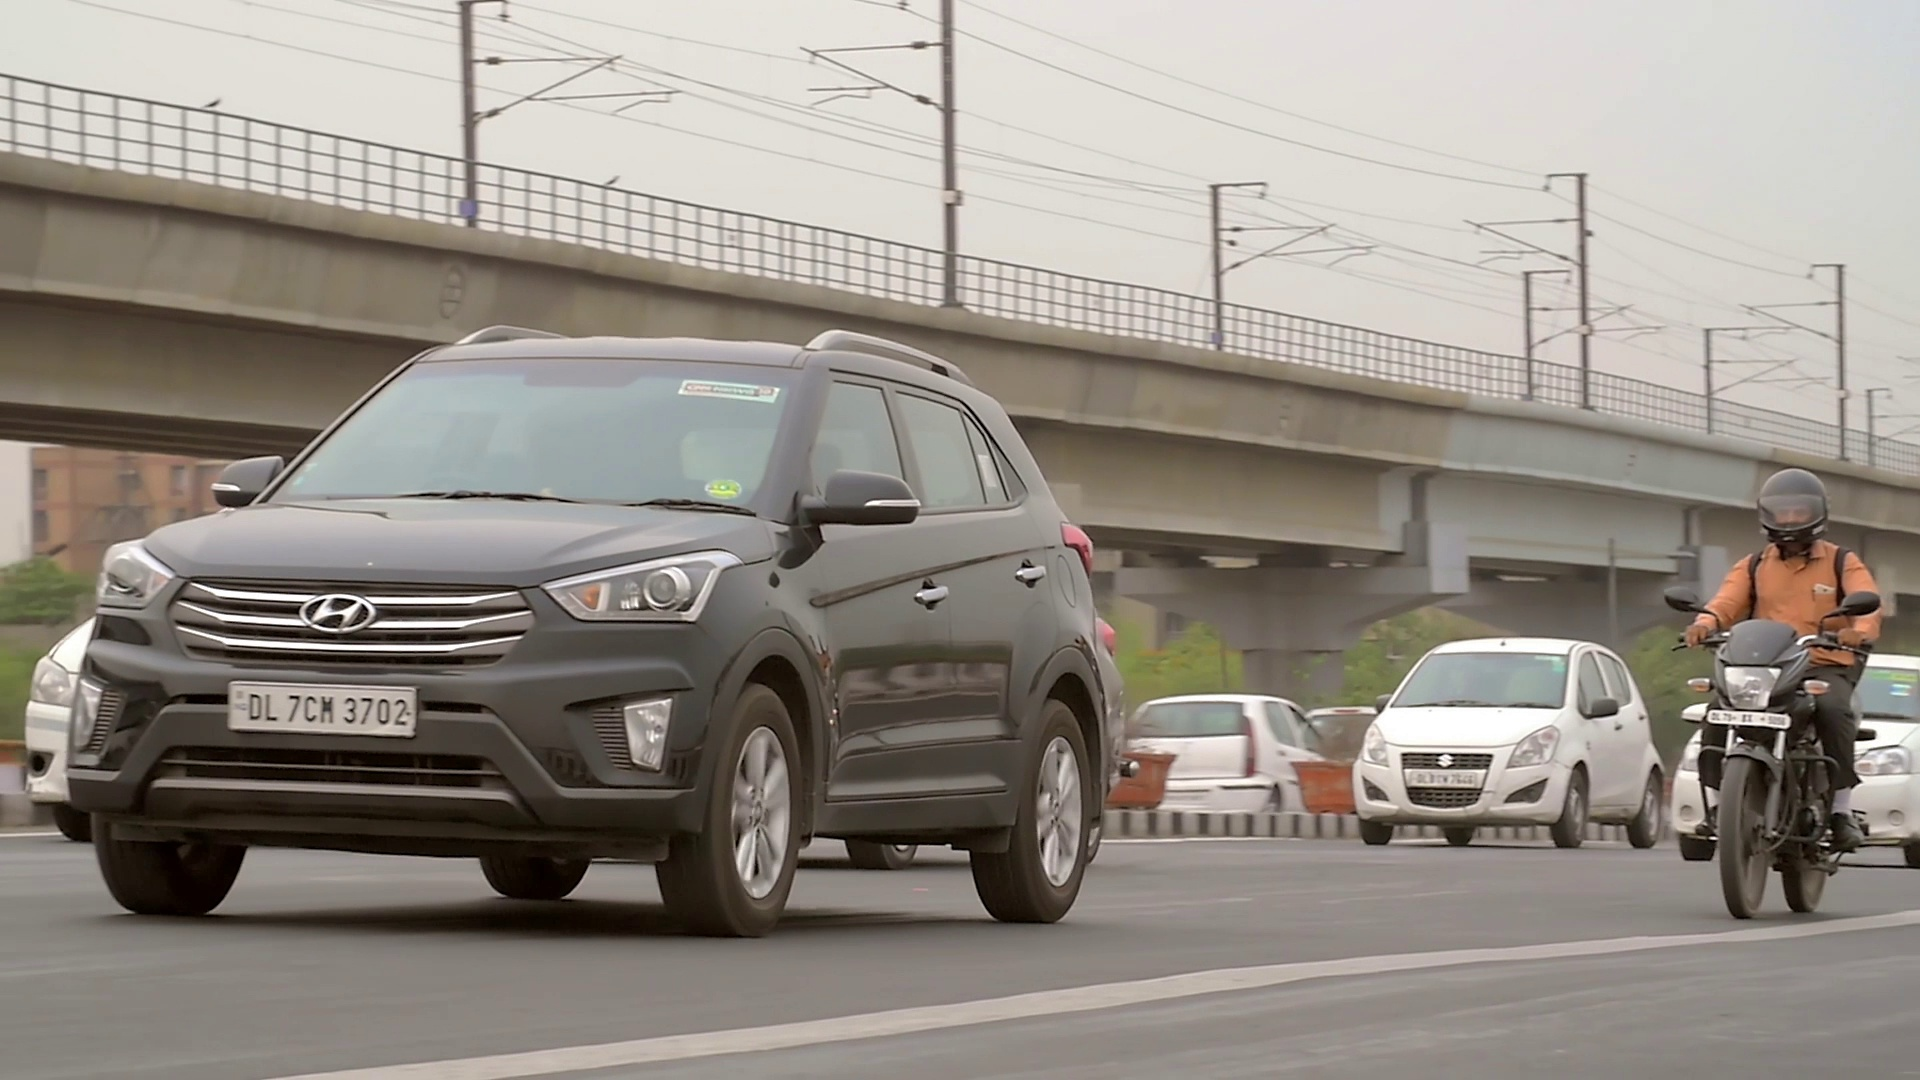

In [ ]:
#LOAD THE MODEL

import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

path_to_saved_model= model_path+ "/saved_model"

print('Loading Model...', end=' ')
start_time= time.time()

#Load and save the Model and build detection function
detect_fn= tf.saved_model.load(path_to_saved_model)

end_time= time.time()
elapsed_time= end_time-start_time
print('Done!! Took {} seconds'.format(elapsed_time))

#load label map data for plotting
category_index= label_map_util.create_categories_from_labelmap(label_path,  use_display_name=True)


import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') #suppress matplotlib warning

def load_img_into_nparray(path):
  return np.array(Image.open(path))

""" This fn Loads an image from file into a numpy array.
    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.
    Args:
      path: the file path to the image
    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
"""
    
print('Running inference for {}...'. format(img_path), end=' ')

img= cv2.imread(img_path)
img_rgb= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_expanded= np.expand_dims(img_rgb, axis=0)

#since the input should be tensor, thus convertit 
input_tensor= tf.convert_to_tensor(img)

#Model expects a batch-img , so add and axis with
input_tensor= input_tensor[tf.newaxis, ...]


detections = detect_fn(input_tensor)
# All outputs are batches tensors.
# Convert to numpy arrays, and take index [0] to remove the batch dimension.
# We're only interested in the first num_detections.
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
               for key, value in detections.items()}
detections['num_detections'] = num_detections

#detection_class should be ints
detections['detection_classes']= detections['detection_classes'].astype(np.int64)

image_with_detections = img.copy()

# SET MIN_SCORE_THRESH BASED ON YOU MINIMUM THRESHOLD FOR DETECTIONS
viz_utils.visualize_boxes_and_labels_on_image_array(
      image_with_detections,
      detections['detection_boxes'],
      detections['detection_classes'],
      detections['detection_scores'],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=0.5,
      agnostic_mode=False)

print('Done')
# DISPLAYS OUTPUT IMAGE
cv2_imshow(image_with_detections)
# CLOSES WINDOW ONCE KEY IS PRESSED